Do related immune lineages cluster together based on their ATAC-seq chromatin accessibility?


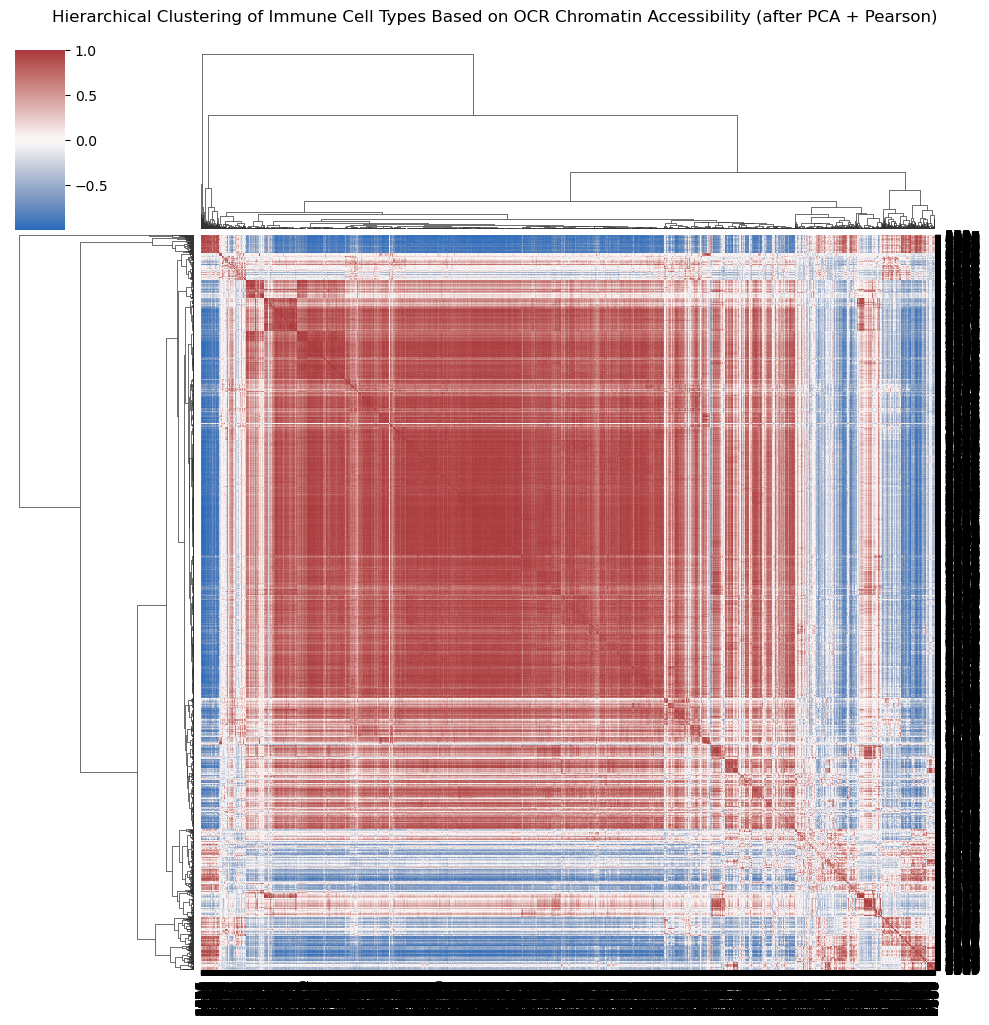

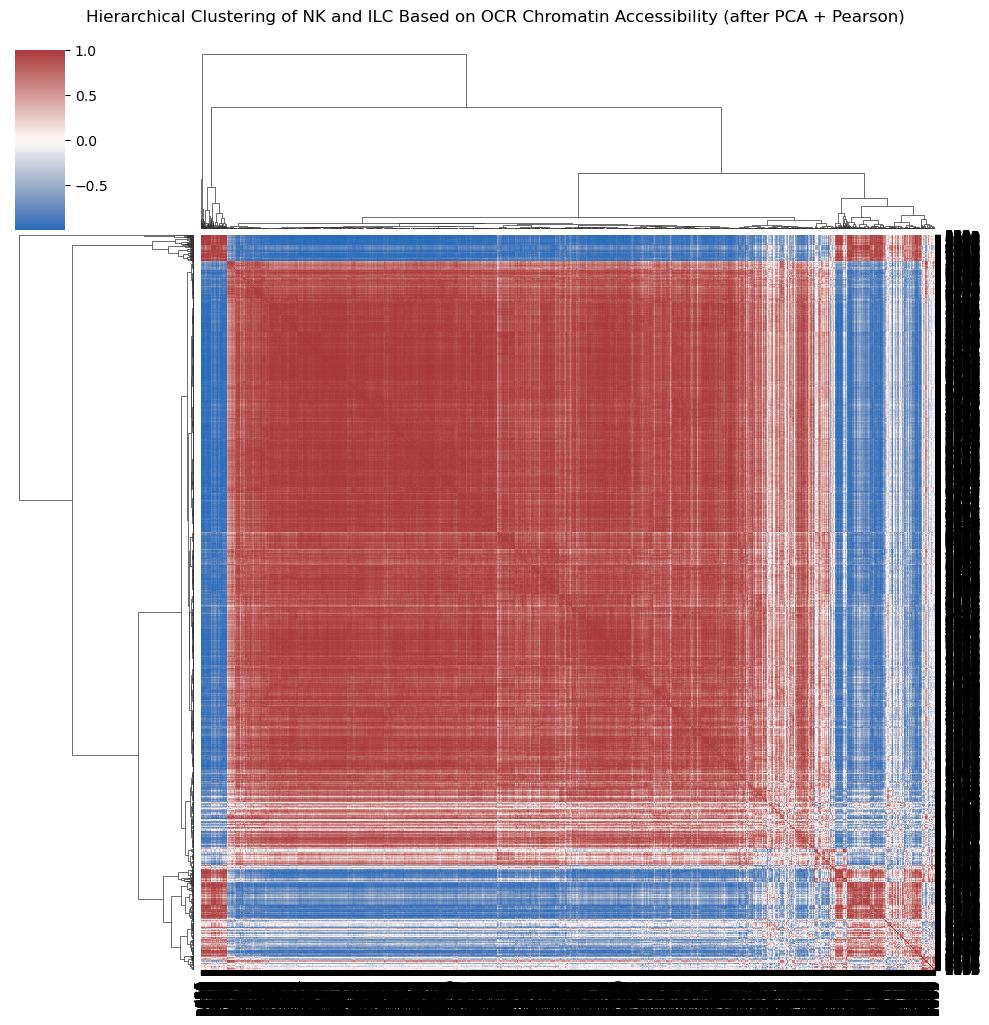

In [ ]:

print("Do related immune lineages cluster together based on their ATAC-seq chromatin accessibility?")
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the cell type columns (from column 54 onward)
df_expr = df_raw.iloc[:5000, 53:]
#ython uses 0-based indexing

df_expr.index.name = "Celltype"

# PCA with 25 components
pca = PCA(n_components=25)
pca_result = pca.fit_transform(df_expr)

#parson correlation across immune cell types
corr_matrix = np.corrcoef(pca_result)

# Hierarchical clustering using Ward's linkage
linkage_matrix = linkage(pdist(pca_result, metric='euclidean'), method='ward')

# Plot heatmap with clustering
sns.clustermap(corr_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix,
               cmap="vlag", figsize=(10, 10), xticklabels=df_expr.index, yticklabels=df_expr.index)
plt.suptitle("Hierarchical Clustering of Immune Cell Types Based on OCR Chromatin Accessibility (after PCA + Pearson)", y=1.02)
plt.show()

#now the same but only with NK and ILC
# Extract only the cell type columns (from column 54 onward)
df_expr_NK_ILC = df_raw.iloc[:5000, 63:72]
#ython uses 0-based indexing
df_expr_NK_ILC.index.name = "Celltype"

# PCA with 25 components
pca2 = PCA(n_components=9)
pca2_result = pca2.fit_transform(df_expr_NK_ILC)

# Pearson correlation across immune cell types
corr_matrix2 = np.corrcoef(pca2_result)

# Hierarchical clustering using Ward's linkage
linkage_matrix2 = linkage(pdist(pca2_result, metric='euclidean'), method='ward')

# Plot heatmap with clustering
sns.clustermap(corr_matrix2, row_linkage=linkage_matrix2, col_linkage=linkage_matrix2,
               cmap="vlag", figsize=(10, 10), xticklabels=df_expr_NK_ILC.index, yticklabels=df_expr.index)
plt.suptitle("Hierarchical Clustering of OCRs omatin Accessibility (after PCA + Pearson)", y=1.02)
plt.show()